# Author: Raymond Fleming  

### Course: Machine Learning Fall 2023

### Chosen Classifier: Random Forest

### Leaderboard Accuracy: .86457 (86.457%)

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Read train and test csv's into pandas dataframes
train=pd.read_csv("/kaggle/input/miniproject2fallfleming23/train.csv")
test=pd.read_csv("/kaggle/input/miniproject2fallfleming23/test.csv")


### First, if there are any missing values in the data set, the columns will either need to be dropped or the imputed values added.

In [89]:
#look for null values in training data
train.isnull().sum()

ID                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

### There are no null values in the dataset, but looking at what values are present might be useful

### Columns will be renamed to remove hyphens from column names, this will make processing easier

In [90]:
train=train.rename(columns={'education-num':'grade','marital-status':'married','capital-gain':'gain','capital-loss':'loss','hours-per-week':'hours','native-country':'origin'})
test=test.rename(columns={'education-num':'grade','marital-status':'married','capital-gain':'gain','capital-loss':'loss','hours-per-week':'hours','native-country':'origin'})

In [91]:
train.dtypes

ID               int64
age              int64
workclass       object
fnlwgt           int64
education       object
grade            int64
married         object
occupation      object
relationship    object
race            object
sex             object
gain             int64
loss             int64
hours            int64
origin          object
Income           int64
dtype: object

### There are 8 categorical variables which will need to be encoded, these are workclass, education, married, occupation, relationship, race, sex, and origin

### Next, which values and their counts for each column will be checked

In [92]:
train.workclass.value_counts()

workclass
 Private             27141
 Self-emp-not-inc     3068
 Local-gov            2535
 ?                    2233
 State-gov            1556
 Self-emp-inc         1363
 Federal-gov          1150
 Without-pay            19
 Never-worked            8
Name: count, dtype: int64

The workclass feature has a value "?" which is likely similar to null.  This value will either be dropped or imputed.

In [93]:
train.married.value_counts()

married
 Married-civ-spouse       17951
 Never-married            12835
 Divorced                  5298
 Separated                 1233
 Widowed                   1226
 Married-spouse-absent      502
 Married-AF-spouse           28
Name: count, dtype: int64

In [94]:
train.occupation.value_counts()

occupation
 Prof-specialty       4915
 Exec-managerial      4893
 Craft-repair         4872
 Adm-clerical         4466
 Sales                4413
 Other-service        3900
 Machine-op-inspct    2462
 ?                    2241
 Transport-moving     1908
 Handlers-cleaners    1678
 Farming-fishing      1181
 Tech-support         1124
 Protective-serv       806
 Priv-house-serv       200
 Armed-Forces           14
Name: count, dtype: int64

In [95]:
train.relationship.value_counts()

relationship
 Husband           15822
 Not-in-family     10061
 Own-child          6033
 Unmarried          4087
 Wife               1852
 Other-relative     1218
Name: count, dtype: int64

In [96]:
train.race.value_counts()

race
 White                 33414
 Black                  3741
 Asian-Pac-Islander     1215
 Amer-Indian-Eskimo      366
 Other                   337
Name: count, dtype: int64

In [97]:
train.sex.value_counts()

sex
 Male      26170
 Female    12903
Name: count, dtype: int64

In [98]:
train.origin.value_counts()

origin
 United-States                 35059
 Mexico                          790
 ?                               688
 Philippines                     231
 Germany                         159
 Puerto-Rico                     143
 Canada                          142
 El-Salvador                     124
 India                           120
 Cuba                            113
 China                            97
 England                          96
 South                            96
 Dominican-Republic               86
 Jamaica                          84
 Italy                            83
 Poland                           74
 Japan                            70
 Guatemala                        70
 Columbia                         69
 Vietnam                          67
 Portugal                         61
 Haiti                            60
 Taiwan                           53
 Iran                             47
 Ecuador                          39
 Peru                          

### Next, the categorical variables will be encoded using a map function, with the exception of education which is a duplicate of the education-num (renamed grade) column which will be dropped later.

In [99]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(train['workclass'])))}
train['workclass']=train['workclass'].map(class_mapping)
test['workclass']=test['workclass'].map(class_mapping)
class_mapping

{' ?': 0,
 ' Federal-gov': 1,
 ' Local-gov': 2,
 ' Never-worked': 3,
 ' Private': 4,
 ' Self-emp-inc': 5,
 ' Self-emp-not-inc': 6,
 ' State-gov': 7,
 ' Without-pay': 8}

In [101]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(train['married'])))}
train['married']=train['married'].map(class_mapping)
test['married']=test['married'].map(class_mapping)
class_mapping

{' Divorced': 0,
 ' Married-AF-spouse': 1,
 ' Married-civ-spouse': 2,
 ' Married-spouse-absent': 3,
 ' Never-married': 4,
 ' Separated': 5,
 ' Widowed': 6}

In [102]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(train['occupation'])))}
train['occupation']=train['occupation'].map(class_mapping)
test['occupation']=test['occupation'].map(class_mapping)
class_mapping

{' ?': 0,
 ' Adm-clerical': 1,
 ' Armed-Forces': 2,
 ' Craft-repair': 3,
 ' Exec-managerial': 4,
 ' Farming-fishing': 5,
 ' Handlers-cleaners': 6,
 ' Machine-op-inspct': 7,
 ' Other-service': 8,
 ' Priv-house-serv': 9,
 ' Prof-specialty': 10,
 ' Protective-serv': 11,
 ' Sales': 12,
 ' Tech-support': 13,
 ' Transport-moving': 14}

In [103]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(train['relationship'])))}
train['relationship']=train['relationship'].map(class_mapping)
test['relationship']=test['relationship'].map(class_mapping)
class_mapping

{' Husband': 0,
 ' Not-in-family': 1,
 ' Other-relative': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Wife': 5}

In [104]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(train['race'])))}
train['race']=train['race'].map(class_mapping)
test['race']=test['race'].map(class_mapping)
class_mapping

{' Amer-Indian-Eskimo': 0,
 ' Asian-Pac-Islander': 1,
 ' Black': 2,
 ' Other': 3,
 ' White': 4}

In [105]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(train['sex'])))}
train['sex']=train['sex'].map(class_mapping)
test['sex']=test['sex'].map(class_mapping)
class_mapping

{' Female': 0, ' Male': 1}

In [106]:
class_mapping={label:idx for idx, label in (enumerate(np.unique(train['origin'])))}
train['origin']=train['origin'].map(class_mapping)
test['origin']=test['origin'].map(class_mapping)
class_mapping

{' ?': 0,
 ' Cambodia': 1,
 ' Canada': 2,
 ' China': 3,
 ' Columbia': 4,
 ' Cuba': 5,
 ' Dominican-Republic': 6,
 ' Ecuador': 7,
 ' El-Salvador': 8,
 ' England': 9,
 ' France': 10,
 ' Germany': 11,
 ' Greece': 12,
 ' Guatemala': 13,
 ' Haiti': 14,
 ' Holand-Netherlands': 15,
 ' Honduras': 16,
 ' Hong': 17,
 ' Hungary': 18,
 ' India': 19,
 ' Iran': 20,
 ' Ireland': 21,
 ' Italy': 22,
 ' Jamaica': 23,
 ' Japan': 24,
 ' Laos': 25,
 ' Mexico': 26,
 ' Nicaragua': 27,
 ' Outlying-US(Guam-USVI-etc)': 28,
 ' Peru': 29,
 ' Philippines': 30,
 ' Poland': 31,
 ' Portugal': 32,
 ' Puerto-Rico': 33,
 ' Scotland': 34,
 ' South': 35,
 ' Taiwan': 36,
 ' Thailand': 37,
 ' Trinadad&Tobago': 38,
 ' United-States': 39,
 ' Vietnam': 40,
 ' Yugoslavia': 41}

### Next, the full histograms of the encoded features will be viewed, followed by one for income over 50000, and one for income lower than 50000. This may show a pattern.

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'married'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'gain'}>,
        <Axes: title={'center': 'loss'}>],
       [<Axes: title={'center': 'hours'}>,
        <Axes: title={'center': 'origin'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

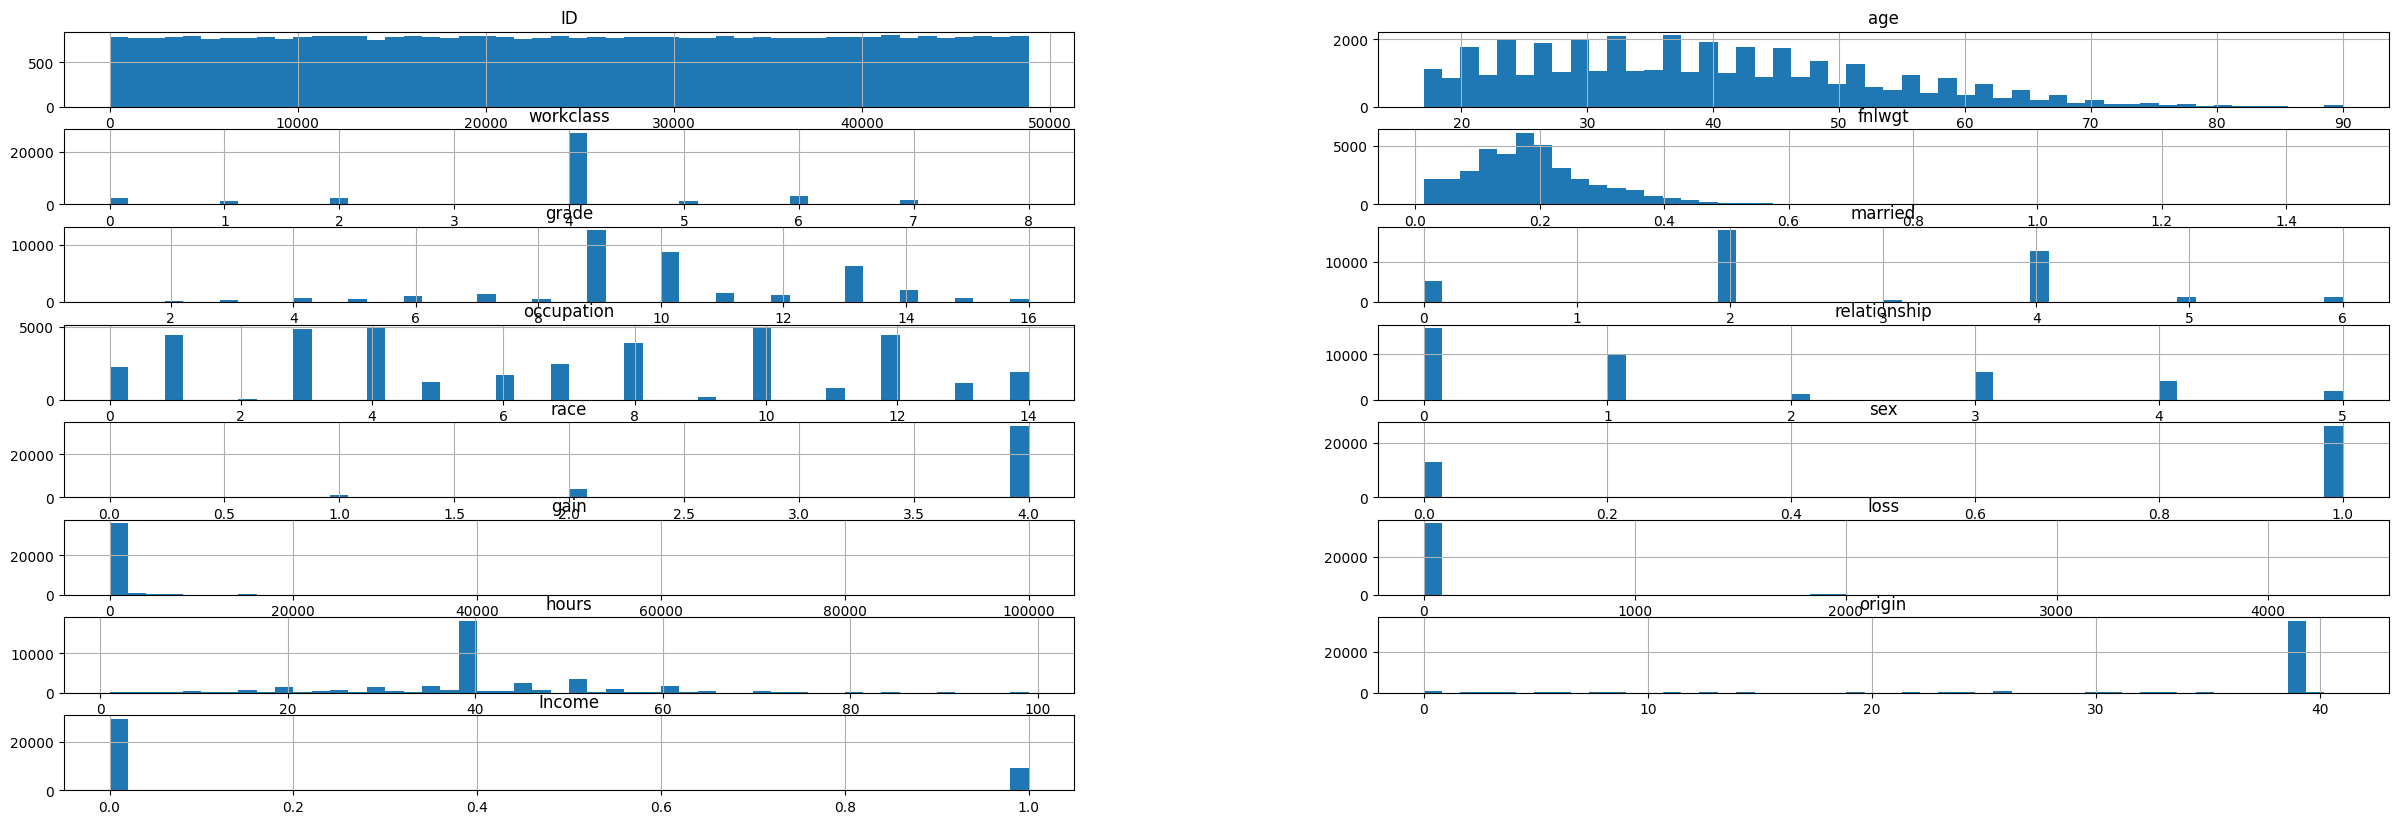

In [108]:
train.hist(bins=50,figsize=(30,20),layout=(16,2))

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'married'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'gain'}>,
        <Axes: title={'center': 'loss'}>],
       [<Axes: title={'center': 'hours'}>,
        <Axes: title={'center': 'origin'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

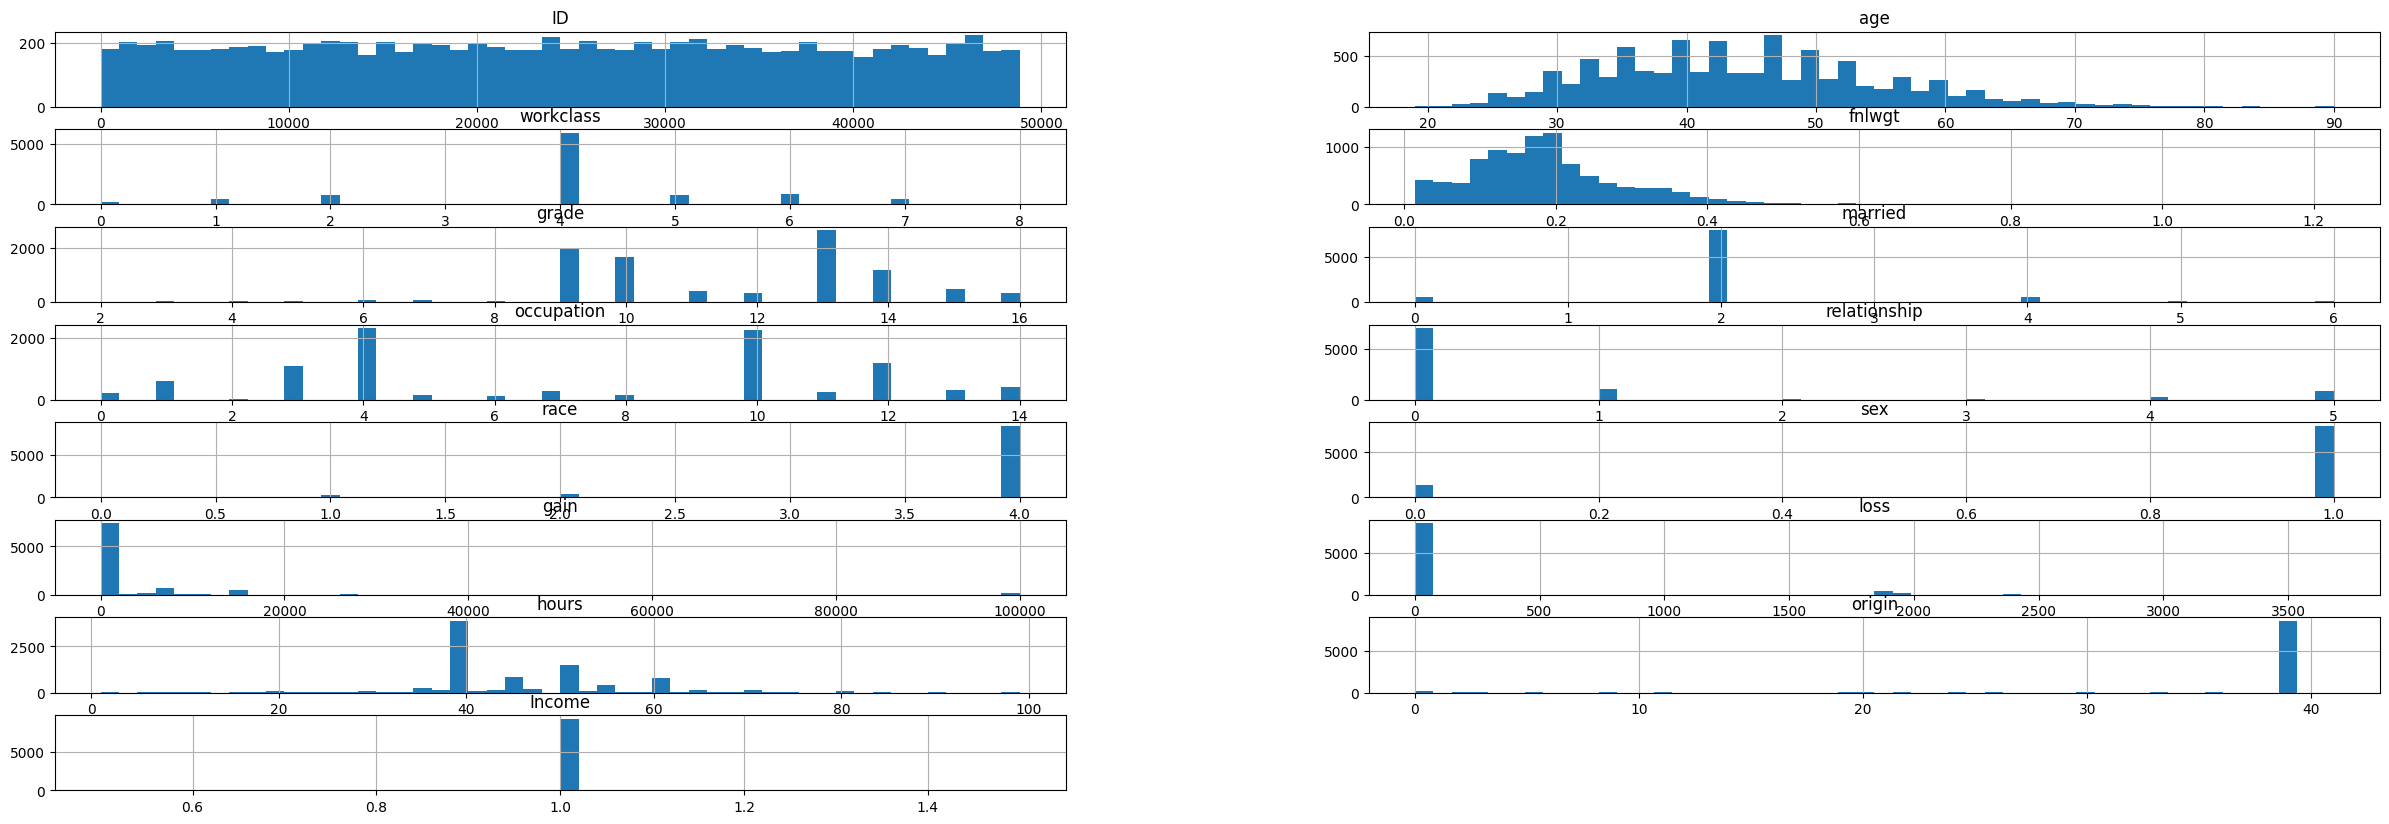

In [109]:
train[train["Income"]==1].hist(bins=50,figsize=(30,20),layout=(16,2))

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'married'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'gain'}>,
        <Axes: title={'center': 'loss'}>],
       [<Axes: title={'center': 'hours'}>,
        <Axes: title={'center': 'origin'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

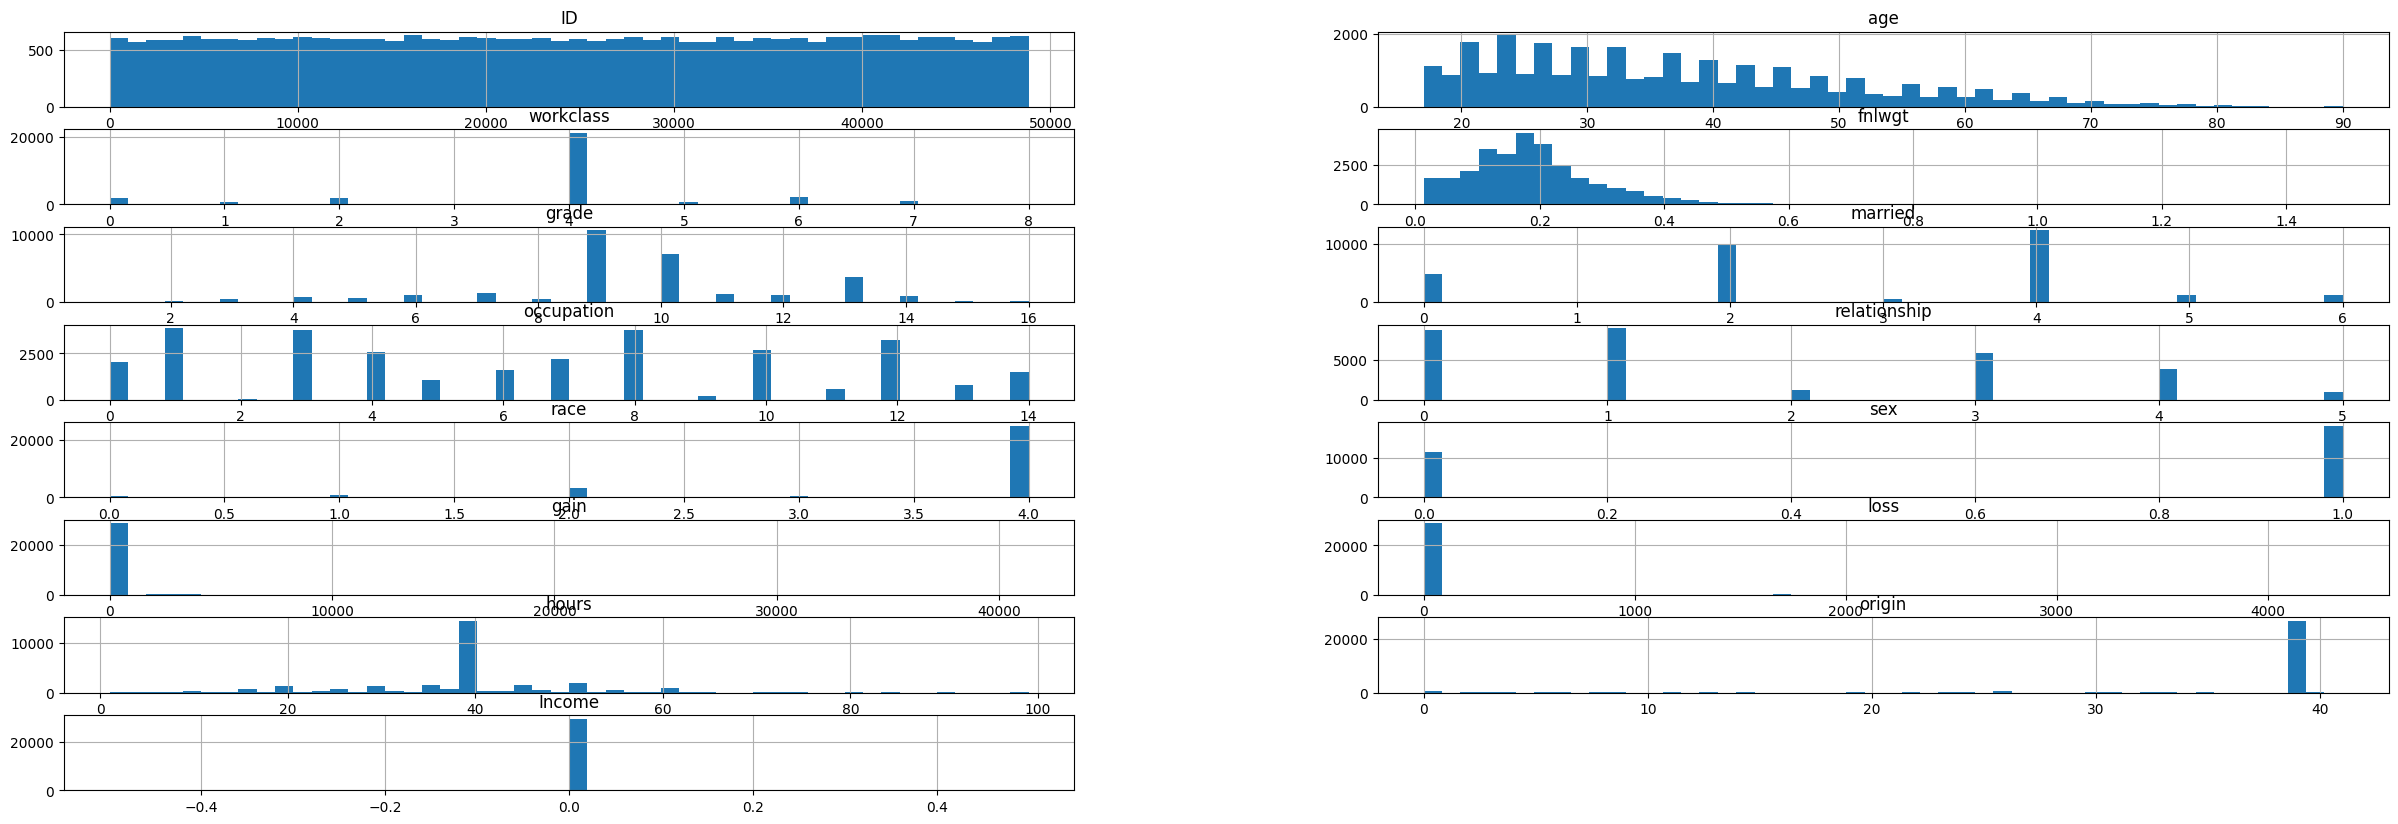

In [110]:
train[train["Income"]==0].hist(bins=50,figsize=(30,20),layout=(16,2))

### In looking at the histograms, age can likely be binned into decades safely to reduce complexity. Workclass doesn't have an immediately visible pattern. Fnlwgt doesn't appear different between income levels, this column may be dropped during later work.  Grade,married,occupation,relationship,race,and sex are already separated and will be left intact. Gain and loss are both useful for this model, these will be binned at 100 (gain / loss greater than or less than 100). Binning hours by 5-10 hours will likely help simplify, and while origin doesn't immediately appear to have a pattern but it is heavily biased towards the US which could be masking a pattern

### The education column will be dropped, since it is a duplicate of the already encoded grade column

In [111]:
train.drop(['education'],inplace=True,axis=1)
test.drop(['education'],inplace=True,axis=1)

### The training set will be split into features and target, then a scalable test set will be created

In [112]:
#split training dataset into features and target
X=train
y=train.Income
X.drop(['Income'],inplace=True,axis=1)

Xtest=test

### The test set will be split into train and train_test data using a 70/30 split

In [113]:
#split training dataset into labeled test and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)


### Next, the training data will be standardized to improve accuracy of the models

In [114]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)

#scale the split train/test sets
XTrainScaled=sc.transform(X_train)
XTestScaled=sc.transform(X_test)

#scale the test dataset
testscaled=sc.transform(Xtest)

In [115]:
from sklearn.linear_model import Perceptron

#create a perceptron instance
Perceptron=Perceptron(eta0=.01,random_state=1)

#fit scaled training data
Perceptron.fit(XTrainScaled,y_train)

#predict with scaled test data
y_pred_perceptron=Perceptron.predict(XTestScaled)

#check accuracy of model
print(f"Perceptron Accuracy:{accuracy_score(y_test,y_pred_perceptron)}")

#Predict the target column using the scaled test set
pred=Perceptron.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('PerceptronSubmission.csv',index=False)

Perceptron Accuracy:0.8068588977990104


### The perceptron model was not expected to perform well for this data, it is a very simple model but still resulted in 80.686% accuracy on test data. Adjusting $\eta_0$ did not make a large difference on accuracy.

In [116]:
from sklearn.linear_model import LogisticRegression

#create a logistic regression instance
LogRes=LogisticRegression(C=1,solver='newton-cg',multi_class='ovr',max_iter=1000,penalty='l2')

#fit logistic regression model
LogRes.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=LogRes.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=LogRes.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('LogResSubmission.csv',index=False)

Accuracy:0.8286128646988569


### The logistic regression model has a reasonable accuracy of 82.861.  The hyperparameters for this model do not make much of a difference in accuracy, at least for reasonable values of c. Penalties were tested with both l1 and l2, elasticnet was nonfunctional using the saga solver. These changes made no difference on outcome.

In [117]:
from sklearn.svm import SVC

#create a support vector machine instance
svm=SVC(kernel='rbf',C=1,gamma='auto',random_state=1)


#fit support vector machine model
svm.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of the support vector machine model using split test set
y_pred=svm.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=svm.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('SVMSubmission.csv',index=False)

Accuracy:0.8548029346527897


### Hyperparameters for the support vector machine model were tuned and this achieved an 85.480% accuracy, an increase from 80.981% when using default values

In [118]:
from sklearn.tree import DecisionTreeClassifier

#Create a decision tree classifier instance
Tree=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=1)

#Create a decision tree classifier instance
Tree.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=Tree.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=Tree.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('TreeSubmission.csv',index=False)

Accuracy:0.8590684183586419


### With default values, the decision tree classifier provided an accuracy of 81.709%. After tuning the hyperparameters, the accuracy increased to 85.907%. In this case, the max_depth was the hyperparameter responsible for the increase in accuracy.

In [119]:
from sklearn.neighbors import KNeighborsClassifier

#Create a K nearest neighbors instance
knn=KNeighborsClassifier(n_neighbors=64,p=1,metric='minkowski')

#Fit K nearest neighbors model
knn.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=knn.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

#Predict the target column using the scaled test set
pred=knn.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('KNNSubmission.csv',index=False)

Accuracy:0.8410680771199454


### With default hyperparameters, the K nearest neighbors classifier has an accuracy of 81.783%. After tuning, the accuracy is increased to 84.107%

In [120]:
from sklearn.ensemble import RandomForestClassifier

#Create a random forest instance
RandomForest=RandomForestClassifier(n_estimators=1000,random_state=1,n_jobs=2,max_features=3)

#Fit random forest model
RandomForest.fit(XTrainScaled,y_train)

#Predict then test accuracy of predictions of logistic regression model using split test set
y_pred=RandomForest.predict(XTestScaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")


#Predict the target column using the scaled test set
pred=RandomForest.predict(testscaled)

#Output the predictions into the format required (columns: ID #0) into CSV format
out=pd.DataFrame({'ID':test.ID,'#0':pred})
out.to_csv('RandomForestSubmission.csv',index=False)

Accuracy:0.8645282375021327


### Using default hyperparameters, the random forest model has an accuracy of 85.347%. After tuning, this is increased to 86.453%

###  The model chosen to submit for this dataset is the random forest model, although the other models were lower accuracy they were above the 80% benchmark, including the perceptron model.   From this point, its likely that incremental improvements in accuracy could be found by binning features such as age and native country.  Given that the accuracy of all models are above the benchmark without this level of preprocessing, the model will be used in its current state.  Workclass and native-country both have a label of '?' which may be able to be separated and better values assigned, this label is likely a mixture of other labels. If these could be separated into the correct label, it will likely improve accuracy.